In [1]:
import fastbook
fastbook.setup_book()

C:\Python399\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
Path('/datasets')

Path('/datasets')

In [4]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/mnist_png.tgz')

In [5]:
train_path = (path/'training').ls().sorted() # Read the folder training and list all subfolders: 0 to 9
x_train = []
y_train = []
for i, pat in enumerate(train_path): # Go through each subfolder of 'training'
    num = [tensor(Image.open(o)).float() for o in (pat).ls()] # Open each image of the respective subfolder as float matrix (28x28) and store it in the x_train vector
    x_train += num
    y_train += tensor([i]*len(num)).unsqueeze(1) # y_train is simply the respective number as label (0 to 9)
x_train = torch.cat([x.view(-1,28*28) for x in x_train]) # Convert the rank-3 vector to rank-2
y_train = torch.stack(y_train)
training_dataset = list(zip(x_train,y_train))

x_train.shape, y_train.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [6]:
test_path = (path/'testing').ls().sorted() # Read the folder 'testing' and list all subfolders: 0 to 9
x_test = []
y_test = []
for i, pat in enumerate(test_path): # Go through each subfolder of 'testing'
    num = [tensor(Image.open(o)).float() for o in (pat).ls()] # Open each image of the respective subfolder as float matrix (28x28) and store it in the x_testing vector
    x_test += num
    y_test += tensor([i]*len(num)).unsqueeze(1) # y_train is simply the respective number as label (0 to 9)
x_test = torch.cat([x.view(-1,28*28) for x in x_test]) # Convert the rank-3 vector to rank-2
y_test = torch.stack(y_test)
testing_dataset = list(zip(x_test,y_test))

In [7]:
training_dl = DataLoader(training_dataset,batch_size=256,shuffle=True)

In [8]:
valid_dl = DataLoader(testing_dataset,batch_size=256,shuffle=True)

In [9]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

def linear1(xb): return xb@weights + bias

def mnist_loss(predictions, targets):
    loss = nn.CrossEntropyLoss()
    return loss(predictions,targets.squeeze())

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()
    return loss

def train_epoch(model):
    batch_loss = []
    for xb,yb in training_dl:
        batch_loss.append(calc_grad(xb, yb, model))
        opt.step()
        opt.zero_grad()
    print('Batch loss:',tensor(batch_loss).mean())

def batch_acc(pred,target):
    digit_pred = pred.max(dim=1)[1]
    target = target.squeeze()
    # print(digit_pred)
    # print(target)
    return (digit_pred==target).float().mean()

def train_model(model, epochs):
    for i in range(epochs):
        print('Epoch',i,':')
        train_epoch(model)
        print('Accuracy',batch_acc(model(x_test),y_test))

In [10]:
lr = 0.001
# This method is native of fastai, it simply does batch@weights + bias
doublelayernet = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

opt = SGD(doublelayernet.parameters(),lr) # Optimizer, SGD is a module native of fastai
train_model(doublelayernet,60)

Epoch 0 :
Batch loss: tensor(1.0078)
Accuracy tensor(0.8525)
Epoch 1 :
Batch loss: tensor(0.4332)
Accuracy tensor(0.8948)
Epoch 2 :
Batch loss: tensor(0.3395)
Accuracy tensor(0.9080)
Epoch 3 :
Batch loss: tensor(0.2878)
Accuracy tensor(0.9157)
Epoch 4 :
Batch loss: tensor(0.2536)
Accuracy tensor(0.9248)
Epoch 5 :
Batch loss: tensor(0.2299)
Accuracy tensor(0.9302)
Epoch 6 :
Batch loss: tensor(0.2109)
Accuracy tensor(0.9330)
Epoch 7 :
Batch loss: tensor(0.1964)
Accuracy tensor(0.9379)
Epoch 8 :
Batch loss: tensor(0.1840)
Accuracy tensor(0.9403)
Epoch 9 :
Batch loss: tensor(0.1741)
Accuracy tensor(0.9424)
Epoch 10 :
Batch loss: tensor(0.1650)
Accuracy tensor(0.9441)
Epoch 11 :
Batch loss: tensor(0.1574)
Accuracy tensor(0.9461)
Epoch 12 :
Batch loss: tensor(0.1503)
Accuracy tensor(0.9466)
Epoch 13 :
Batch loss: tensor(0.1438)
Accuracy tensor(0.9494)
Epoch 14 :
Batch loss: tensor(0.1377)
Accuracy tensor(0.9487)
Epoch 15 :
Batch loss: tensor(0.1328)
Accuracy tensor(0.9505)
Epoch 16 :
Batch l

In [11]:
dls = DataLoaders(training_dl,valid_dl)

In [14]:
learn = Learner(dls,doublelayernet,opt_func=SGD,loss_func=mnist_loss,metrics=batch_acc)

In [15]:
learn.fit(60,lr=.001)

epoch,train_loss,valid_loss,batch_acc,time
0,0.013964,0.134871,0.966100,00:01
1,0.013655,0.135045,0.966900,00:01
2,0.013283,0.134205,0.967400,00:01
3,0.013607,0.136511,0.966600,00:01
4,0.013745,0.136269,0.967500,00:01
5,0.013367,0.134378,0.967200,00:01
6,0.013933,0.137153,0.966800,00:01
7,0.011600,0.137720,0.966400,00:01
8,0.011700,0.136961,0.967300,00:01
9,0.011256,0.137065,0.967300,00:01


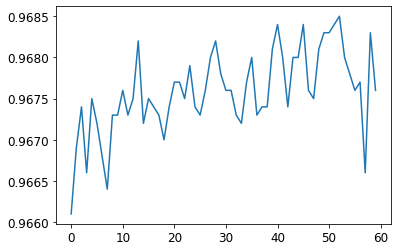

In [17]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [18]:
lr =.02

linear_model = nn.Linear(28*28,10) # This method is native of fastai, it simply does batch@weights + bias

opt = SGD(linear_model.parameters(),lr) # Optimizer, SGD is a module native of fastai
train_model(linear_model,60)

Epoch 0 :
Batch loss: tensor(533.7550)
Accuracy tensor(0.8776)
Epoch 1 :
Batch loss: tensor(264.3576)
Accuracy tensor(0.8758)
Epoch 2 :
Batch loss: tensor(252.8968)
Accuracy tensor(0.8703)
Epoch 3 :
Batch loss: tensor(225.2271)
Accuracy tensor(0.8925)
Epoch 4 :
Batch loss: tensor(239.8308)
Accuracy tensor(0.8954)
Epoch 5 :
Batch loss: tensor(223.3325)
Accuracy tensor(0.8635)
Epoch 6 :
Batch loss: tensor(237.4666)
Accuracy tensor(0.9064)
Epoch 7 :
Batch loss: tensor(207.1640)
Accuracy tensor(0.8855)
Epoch 8 :
Batch loss: tensor(225.2746)
Accuracy tensor(0.8880)
Epoch 9 :
Batch loss: tensor(208.8560)
Accuracy tensor(0.9077)
Epoch 10 :
Batch loss: tensor(213.0161)
Accuracy tensor(0.7632)
Epoch 11 :
Batch loss: tensor(201.6046)
Accuracy tensor(0.8538)
Epoch 12 :
Batch loss: tensor(197.6006)
Accuracy tensor(0.6460)
Epoch 13 :
Batch loss: tensor(209.9433)
Accuracy tensor(0.8380)
Epoch 14 :
Batch loss: tensor(224.9804)
Accuracy tensor(0.8421)
Epoch 15 :
Batch loss: tensor(206.3323)
Accuracy t

In [20]:
# It takes too long to simulate without a GPU

path = Path('./datasets/mnist_png')
dls = ImageDataLoaders.from_folder(path,train='training',valid='testing')
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


epoch,train_loss,valid_loss,accuracy,time
0,0.102635,0.040541,0.987400,19:54
